## Example / Tutorial for the use of Decision Trees

In this example we will look at how to use decision trees for classification.
This technique works for labeled data and is therefore in the category of <b> supervised learning </b>.
First we must have some imports to get up and running:

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Okay, so now we can start to look at some data:

Number of samples: 150


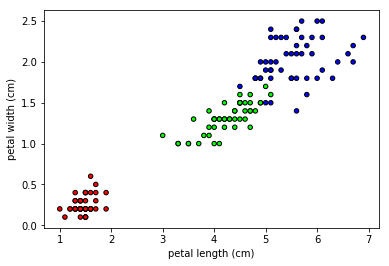

In [19]:
iris = load_iris()  # load iris sample dataset
X = iris.data[:,2:] # petal length and width, so 2D information
y = iris.target
# check how many samples we have
print("Number of samples: " +str(len(y)))
#visulize the dataset
plt.figure()
#define colors - red, green, blue
colormap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# pplot labxel
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap,edgecolor='black', s=20)


Above you can see a visualiation of the data. In this case we are just looking at 2D, but it is important to note that decision trees work on n-dimensional data without any problems.
As you can see from the data, we have 3 groups of data, each with a different color. So this data will be our training set. We now want to train a decision tree on this data, and then this decision tree classifier should of course be able to predict the classification of future data points

In [20]:
%%time
#time the execution time of this cell.

tree_clf = DecisionTreeClassifier(max_depth=2) ## indicate we do not want the tree to be deeper than 2 levels
tree_clf.fit(X,y) # training the classifier
print("seed : "+ str(tree_clf.random_state))

#prediction
print("probability of point = (2,1) = "+str(tree_clf.predict_proba([[2,1]])))
print("probability of point = (4,1) = "+str(tree_clf.predict_proba([[4,1]])))
print("probability of point = (5,2) =  "+str(tree_clf.predict_proba([[5,2]])))


seed : None
probability of point = (2,1) = [[ 1.  0.  0.]]
probability of point = (4,1) = [[ 0.          0.90740741  0.09259259]]
probability of point = (5,2) =  [[ 0.          0.02173913  0.97826087]]
Wall time: 8.01 ms


As you can see the new data point (2,1) is with a probablity of 100 % classified as group 0 (red),
and the point (4,1) is classified with 90,7% probability as group 1 (green) and finally the point
(5,2) is classified with 97.8% probability as group 2 (blue). You can verify this looks what we would expect by looking at the graph.

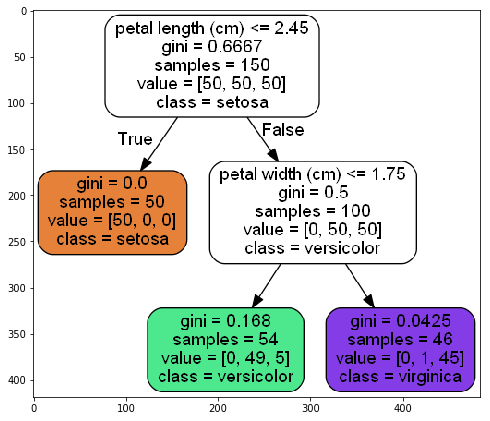

In [21]:
import pydotplus
from sklearn.externals.six import StringIO  
import matplotlib.image as mpimg
import io

dot_data = io.StringIO()

export_graphviz(tree_clf,
                out_file=dot_data, # or put a filename here filename like "graph.dot", you then need to convert it into pgn
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename) # write the dot data to a pgn file
img=mpimg.imread(filename) # read this pgn file

plt.figure(figsize=(8,8)) # setting the size to 10 x 10 inches of the figure.
imgplot = plt.imshow(img) # plot the image.
plt.show()

We can try to visualize how this decision tree splits the data (note: there can be several different splits of the data, that all leads to the same gini values - this is then randomly decided by the algorithm what to do. 

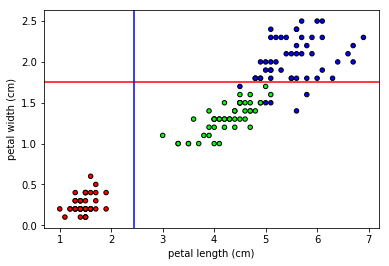

In [22]:
plt.figure()
# pplot labxel
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap,edgecolor='black', s=20)
#drawing the splits
plt.axhline(y=1.75, color='red', linestyle='-')
plt.axvline(x=2.45, color = 'blue',linestyle='-')

So as you can see above, there are two splits visualized. The first one splits on the petal length < 2.45 and the other one splits on the data on the other parameter, the petal width < 1.75.